In [1]:
import numpy as np
import pandas as pd

## Reading the files

In [2]:
books = pd.read_csv('books.csv')

C:\Users\acer\AppData\Local\Temp\ipykernel_28140\1848672579.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [3]:
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
books.head(7)

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   
5  0399135782                             The Kitchen God's Wife   
6  0425176428  What If?: The World's Foremost Military Histor...   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   
5               Amy Tan                1991            Putnam Pub Group   
6         Robert Cowley                2000    Berkley Publishing Group   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   
5  http://images.amazon.com/images/P/0399135782.0...   
6  http://images.amazon.com/images/P/0425176428.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   
5  http://images.amazon.com/images/P/0399135782.0...   
6  http://images.amazon.com/images/P/0425176428.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...  
5  http://images.amazon.com/images/P/0399135782.0...  
6  http://images.amazon.com/images/P/0425176428.0...

In [5]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [6]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

### checking dimensions of the datasets

In [7]:
books.shape

(271360, 8)

In [8]:
users.shape

(278858, 3)

In [9]:
ratings.shape

(1149780, 3)

### checking for null or redundant values

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

# Data preparing

## Recommending top books at first

### merging ratings and books, using ISBN as common column

In [16]:
ratings_with_bkname = ratings.merge(books,on='ISBN')

In [17]:
ratings_with_bkname

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
1         276726  0155061224            5   
2         276727  0446520802            0   
3         276729  052165615X            3   
4         276729  0521795028            6   
...          ...         ...          ...   
1031131   276704  0876044011            0   
1031132   276704  1563526298            9   
1031133   276706  0679447156            0   
1031134   276709  0515107662           10   
1031135   276721  0590442449           10   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                         Rites of Passage         Judith Rae   
2                                             The Notebook    Nicholas Sparks   
3                                           Help!: Level 1      Philip Prowse   
4        The Amsterdam Connection : Level 4 (Cambridge ...        Sue Leather   
...                                                    ...                ...   
1031131  Edgar Cayce on the Akashic Records: The Book o...  Kevin J. Todeschi   
1031132  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1031133  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1031134   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1031135                                  Fourth Grade Rats     Jerry Spinelli   

        Year-Of-Publication  \
0                      2002   
1                      2001   
2                      1996   
3                      1999   
4                      2001   
...                     ...   
1031131                1998   
1031132                2000   
1031133                1997   
1031134                1996   
1031135                1996   

                                                 Publisher  \
0                                         Ballantine Books   
1                                                   Heinle   
2                                             Warner Books   
3                               Cambridge University Press   
4                               Cambridge University Press   
...                                                    ...   
1031131  A.R.E. Press (Association of Research &amp; Enlig   
1031132                                   Longstreet Press   
1031133                                    Alfred A. Knopf   
1031134                                         Jove Books   
1031135                                         Scholastic   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031131  http://images.amazon.com/images/P/0876044011.0...   
1031132  http://images.amazon.com/images/P/1563526298.0...   
1031133  http://images.amazon.com/images/P/0679447156.0...   
1031134  http://images.amazon.com/images/P/0515107662.0...   
1031135  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031131  http://images.amazon.com/images/P/0876044011.0...   
1031132  http://images.amazon.com/images/P/1563526298.0...   
1031133  http://images.amazon.com/images/P/0679447156.0...   
1031134  htt

In [18]:
num_rating_df = ratings_with_bkname.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

Book-Title  num_ratings
0        A Light in the Storm: The Civil War Diary of ...            4
1                                   Always Have Popsicles            1
2                    Apple Magic (The Collector's series)            1
3        Ask Lily (Young Women of Faith: Lily Series, ...            1
4        Beyond IBM: Leadership Marketing and Finance ...            1
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.            2
241067                     Ã?Â?rger mit Produkt X. Roman.            4
241068                                Ã?Â?sterlich leben.            1
241069                              Ã?Â?stlich der Berge.            3
241070                                  Ã?Â?thique en toc            2

[241071 rows x 2 columns]

### Finding the avg rating of each book

In [19]:
avg_rating_df = ratings_with_bkname.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df


Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]

In [20]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

Book-Title  num_ratings  \
0        A Light in the Storm: The Civil War Diary of ...            4   
1                                   Always Have Popsicles            1   
2                    Apple Magic (The Collector's series)            1   
3        Ask Lily (Young Women of Faith: Lily Series, ...            1   
4        Beyond IBM: Leadership Marketing and Finance ...            1   
...                                                   ...          ...   
241066                                      Ã?Â?lpiraten.            2   
241067                     Ã?Â?rger mit Produkt X. Roman.            4   
241068                                Ã?Â?sterlich leben.            1   
241069                              Ã?Â?stlich der Berge.            3   
241070                                  Ã?Â?thique en toc            2   

        avg_rating  
0         2.250000  
1         0.000000  
2         0.000000  
3         8.000000  
4         0.000000  
...            ...  
241066    0.000000  
241067    5.250000  
241068    7.000000  
241069    2.666667  
241070    4.000000  

[241071 rows x 3 columns]

#### Finding books with more than 250 ratings, in descending order and removing duplicates

In [21]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [22]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [23]:
popular_df

Book-Title  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)   
3         Harry Potter and the Goblet of Fire (Book 4)   
5       Harry Potter and the Sorcerer's Stone (Book 1)   
9    Harry Potter and the Order of the Phoenix (Boo...   
13    Harry Potter and the Chamber of Secrets (Book 2)   
16   The Hobbit : The Enchanting Prelude to The Lor...   
17   The Fellowship of the Ring (The Lord of the Ri...   
26   Harry Potter and the Sorcerer's Stone (Harry P...   
28      The Two Towers (The Lord of the Rings, Part 2)   
39                               To Kill a Mockingbird   
47                                   The Da Vinci Code   
53                  The Five People You Meet in Heaven   
55                              The Catcher in the Rye   
62                           The Lovely Bones: A Novel   
63                                                1984   
72                            Prodigal Summer: A Novel   
73                                          Neverwhere   
78                             The Secret Life of Bees   
84   Stupid White Men ...and Other Sorry Excuses fo...   
85   Tuesdays with Morrie: An Old Man, a Young Man,...   
88                 The Red Tent (Bestselling Backlist)   
89                The Hitchhiker's Guide to the Galaxy   
98    Nickel and Dimed: On (Not) Getting By in America   
100                                      Into the Wild   
103                                     Fahrenheit 451   
116                          Girl with a Pearl Earring   
117                                          Outlander   
123  Where the Heart Is (Oprah's Book Club (Paperba...   
124                     Seabiscuit: An American Legend   
126                                         Life of Pi   
130                                     The Bean Trees   
133  A Child Called \It\": One Child's Courage to S...   
135                                     ANGELA'S ASHES   
137                                        Good in Bed   
139  Fast Food Nation: The Dark Side of the All-Ame...   
140                                      American Gods   
141                                 Skipping Christmas   
147  Left Behind: A Novel of the Earth's Last Days ...   
149    The Golden Compass (His Dark Materials, Book 1)   
157                                   The Color Purple   
163                               Silence of the Lambs   
166                                        About a Boy   
173                  Seven Up (A Stephanie Plum Novel)   
175  The Alchemist: A Fable About Following Your Dream   
177  Hard Eight : A Stephanie Plum Novel (A Stephan...   
182                       Suzanne's Diary for Nicholas   
186                                  Lord of the Flies   
192                            A Prayer for Owen Meany   
194   The Vampire Lestat (Vampire Chronicles, Book II)   
195       White Oleander : A Novel (Oprah's Book Club)   

                Book-Author  \
0             J. K. Rowling   
3             J. K. Rowling   
5             J. K. Rowling   
9             J. K. Rowling   
13            J. K. Rowling   
16           J.R.R. TOLKIEN   
17           J.R.R. TOLKIEN   
26            J. K. Rowling   
28           J.R.R. TOLKIEN   
39               Harper Lee   
47                Dan Brown   
53              Mitch Albom   
55            J.D. Salinger   
62             Alice Sebold   
63            George Orwell   
72       Barbara Kingsolver   
73              Neil Gaiman   
78            Sue Monk Kidd   
84            Michael Moore   
85              MITCH ALBOM   
88            Anita Diamant   
89            Douglas Adams   
98       Barbara Ehrenreich   
100            Jon Krakauer   
103            Ray Bradbury   
116         Tracy Chevalier   
117          DIANA GABALDON   
123            Billie Letts   
124       LAURA HILLENBRAND   
126             Yann Martel   
130      Barbara Kingsolver   
133             Dave Pelzer   
135           Frank McCourt   
137         Jennifer Weiner   


In [24]:
popular_df.shape

(50, 5)

In [25]:
popular_df#This will be updated while more preparation and contain the top books for displaying at home page

Book-Title  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)   
3         Harry Potter and the Goblet of Fire (Book 4)   
5       Harry Potter and the Sorcerer's Stone (Book 1)   
9    Harry Potter and the Order of the Phoenix (Boo...   
13    Harry Potter and the Chamber of Secrets (Book 2)   
16   The Hobbit : The Enchanting Prelude to The Lor...   
17   The Fellowship of the Ring (The Lord of the Ri...   
26   Harry Potter and the Sorcerer's Stone (Harry P...   
28      The Two Towers (The Lord of the Rings, Part 2)   
39                               To Kill a Mockingbird   
47                                   The Da Vinci Code   
53                  The Five People You Meet in Heaven   
55                              The Catcher in the Rye   
62                           The Lovely Bones: A Novel   
63                                                1984   
72                            Prodigal Summer: A Novel   
73                                          Neverwhere   
78                             The Secret Life of Bees   
84   Stupid White Men ...and Other Sorry Excuses fo...   
85   Tuesdays with Morrie: An Old Man, a Young Man,...   
88                 The Red Tent (Bestselling Backlist)   
89                The Hitchhiker's Guide to the Galaxy   
98    Nickel and Dimed: On (Not) Getting By in America   
100                                      Into the Wild   
103                                     Fahrenheit 451   
116                          Girl with a Pearl Earring   
117                                          Outlander   
123  Where the Heart Is (Oprah's Book Club (Paperba...   
124                     Seabiscuit: An American Legend   
126                                         Life of Pi   
130                                     The Bean Trees   
133  A Child Called \It\": One Child's Courage to S...   
135                                     ANGELA'S ASHES   
137                                        Good in Bed   
139  Fast Food Nation: The Dark Side of the All-Ame...   
140                                      American Gods   
141                                 Skipping Christmas   
147  Left Behind: A Novel of the Earth's Last Days ...   
149    The Golden Compass (His Dark Materials, Book 1)   
157                                   The Color Purple   
163                               Silence of the Lambs   
166                                        About a Boy   
173                  Seven Up (A Stephanie Plum Novel)   
175  The Alchemist: A Fable About Following Your Dream   
177  Hard Eight : A Stephanie Plum Novel (A Stephan...   
182                       Suzanne's Diary for Nicholas   
186                                  Lord of the Flies   
192                            A Prayer for Owen Meany   
194   The Vampire Lestat (Vampire Chronicles, Book II)   
195       White Oleander : A Novel (Oprah's Book Club)   

                Book-Author  \
0             J. K. Rowling   
3             J. K. Rowling   
5             J. K. Rowling   
9             J. K. Rowling   
13            J. K. Rowling   
16           J.R.R. TOLKIEN   
17           J.R.R. TOLKIEN   
26            J. K. Rowling   
28           J.R.R. TOLKIEN   
39               Harper Lee   
47                Dan Brown   
53              Mitch Albom   
55            J.D. Salinger   
62             Alice Sebold   
63            George Orwell   
72       Barbara Kingsolver   
73              Neil Gaiman   
78            Sue Monk Kidd   
84            Michael Moore   
85              MITCH ALBOM   
88            Anita Diamant   
89            Douglas Adams   
98       Barbara Ehrenreich   
100            Jon Krakauer   
103            Ray Bradbury   
116         Tracy Chevalier   
117          DIANA GABALDON   
123            Billie Letts   
124       LAURA HILLENBRAND   
126             Yann Martel   
130      Barbara Kingsolver   
133             Dave Pelzer   
135           Frank McCourt   
137         Jennifer Weiner   


## Preparing dataset for recommendations

In [26]:
x = ratings_with_bkname.groupby('User-ID').count()['Book-Rating']>200
useful_users=x[x].index

In [27]:
filtered_ratings=ratings_with_bkname[ratings_with_bkname['User-ID'].isin(useful_users)]

In [28]:
filtered_ratings

User-ID        ISBN  Book-Rating  \
1150      277427  002542730X           10   
1151      277427  0026217457            0   
1152      277427  003008685X            8   
1153      277427  0030615321            0   
1154      277427  0060002050            0   
...          ...         ...          ...   
1029357   275970  1931868123            0   
1029358   275970  3411086211           10   
1029359   275970  3829021860            0   
1029360   275970  4770019572            0   
1029361   275970  9626340762            8   

                                                Book-Title  \
1150     Politically Correct Bedtime Stories: Modern Ta...   
1151                    Vegetarian Times Complete Cookbook   
1152                                              Pioneers   
1153      Ask for May, Settle for June (A Doonesbury book)   
1154                     On a Wicked Dawn (Cynster Novels)   
...                                                    ...   
1029357  There's a Porcupine in My Outhouse: Misadventu...   
1029358                                         Die Biene.   
1029359                                     The Penis Book   
1029360                                            Musashi   
1029361  Northanger Abbey (Classic Literature with Clas...   

                           Book-Author Year-Of-Publication  \
1150                 James Finn Garner                1994   
1151                        Lucy  Moll                1995   
1152             James Fenimore Cooper                1974   
1153                     G. B. Trudeau                1982   
1154                 Stephanie Laurens                2002   
...                                ...                 ...   
1029357                   Mike Tougias                2002   
1029358  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt                1993   
1029359                   Joseph Cohen                1999   
1029360                 Eiji Yoshikawa                1995   
1029361                    Jane Austen                1996   

                                    Publisher  \
1150                John Wiley &amp; Sons Inc   
1151                    John Wiley &amp; Sons   
1152                         Thomson Learning   
1153                      Henry Holt &amp; Co   
1154                               Avon Books   
...                                       ...   
1029357                    Capital Books (VA)   
1029358  Bibliographisches Institut, Mannheim   
1029359                              Konemann   
1029360          Kodansha International (JPN)   
1029361                 Naxos Audiobooks Ltd.   

                                               Image-URL-S  \
1150     http://images.amazon.com/images/P/002542730X.0...   
1151     http://images.amazon.com/images/P/0026217457.0...   
1152     http://images.amazon.com/images/P/003008685X.0...   
1153     http://images.amazon.com/images/P/0030615321.0...   
1154     http://images.amazon.com/images/P/0060002050.0...   
...                                                    ...   
1029357  http://images.amazon.com/images/P/1931868123.0...   
1029358  http://images.amazon.com/images/P/3411086211.0...   
1029359  http://images.amazon.com/images/P/3829021860.0...   
1029360  http://images.amazon.com/images/P/4770019572.0...   
1029361  http://images.amazon.com/images/P/9626340762.0...   

                                               Image-URL-M  \
1150     http://images.amazon.com/images/P/002542730X.0...   
1151     http://images.amazon.com/images/P/0026217457.0...   
1152     http://images.amazon.com/images/P/003008685X.0...   
1153     http://images.amazon.com/images/P/0030615321.0...   
1154     http://images.amazon.com/images/P/0060002050.0...   
...                                                    ...   
1029357  http://images.amazon.com/images/P/1931868123.0...   
1029358  http://images.amazon.com/images/P/3411086211.0...   
1029359  http://images.amazon.com/images/P/3829021860.0...   
1029360  http://images.a

In [29]:
y=filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [30]:
final_ratings=filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [31]:
final_ratings

User-ID        ISBN  Book-Rating  \
1150      277427  002542730X           10   
1163      277427  0060930535            0   
1165      277427  0060934417            0   
1168      277427  0061009059            9   
1174      277427  006440188X            0   
...          ...         ...          ...   
1029196   275970  1400031354            0   
1029197   275970  1400031362            0   
1029270   275970  1573229725            0   
1029309   275970  1586210661            9   
1029310   275970  1586212230            0   

                                                Book-Title  \
1150     Politically Correct Bedtime Stories: Modern Ta...   
1163                         The Poisonwood Bible: A Novel   
1165                                    Bel Canto: A Novel   
1168     One for the Money (Stephanie Plum Novels (Pape...   
1174                                     The Secret Garden   
...                                                    ...   
1029196  Tears of the Giraffe (No.1 Ladies Detective Ag...   
1029197  Morality for Beautiful Girls (No.1 Ladies Dete...   
1029270                                        Fingersmith   
1029309                             Me Talk Pretty One Day   
1029310                                              Naked   

                     Book-Author Year-Of-Publication  \
1150           James Finn Garner                1994   
1163          Barbara Kingsolver                1999   
1165                Ann Patchett                2002   
1168             Janet Evanovich                1995   
1174     Frances Hodgson Burnett                1998   
...                          ...                 ...   
1029196   Alexander McCall Smith                2002   
1029197   Alexander McCall Smith                2002   
1029270             Sarah Waters                2002   
1029309            David Sedaris                2001   
1029310            David Sedaris                2001   

                         Publisher  \
1150     John Wiley &amp; Sons Inc   
1163                     Perennial   
1165                     Perennial   
1168                   HarperTorch   
1174                  HarperTrophy   
...                            ...   
1029196                     Anchor   
1029197                     Anchor   
1029270            Riverhead Books   
1029309    Time Warner Audio Major   
1029310    Time Warner Audio Major   

                                               Image-URL-S  \
1150     http://images.amazon.com/images/P/002542730X.0...   
1163     http://images.amazon.com/images/P/0060930535.0...   
1165     http://images.amazon.com/images/P/0060934417.0...   
1168     http://images.amazon.com/images/P/0061009059.0...   
1174     http://images.amazon.com/images/P/006440188X.0...   
...                                                    ...   
1029196  http://images.amazon.com/images/P/1400031354.0...   
1029197  http://images.amazon.com/images/P/1400031362.0...   
1029270  http://images.amazon.com/images/P/1573229725.0...   
1029309  http://images.amazon.com/images/P/1586210661.0...   
1029310  http://images.amazon.com/images/P/1586212230.0...   

                                               Image-URL-M  \
1150     http://images.amazon.com/images/P/002542730X.0...   
1163     http://images.amazon.com/images/P/0060930535.0...   
1165     http://images.amazon.com/images/P/0060934417.0...   
1168     http://images.amazon.com/images/P/0061009059.0...   
1174     http://images.amazon.com/images/P/006440188X.0...   
...                                                    ...   
1029196  http://images.amazon.com/images/P/1400031354.0...   
1029197  http://images.amazon.com/images/P/1400031362.0...   
1029270  http://images.amazon.com/images/P/1573229725.0...   
1029309  http://images.amazon.com/images/P/1586210661.0...   
1029310  http://images.amazon.com/images/P/1586212230.0...   

                                               Image-URL-L  
1150     http://images.amazon.com/images/P

In [32]:
#creating a new dataframe from existing ones to add a genre column
#after final ratings
pt_with_genres = final_ratings.groupby('Book-Title').agg({
    'Book-Rating': lambda x: round(x.mean(), 1),  # Average ratings
    'Book-Author': 'first',  # Picking the first author 
    'Year-Of-Publication': 'first',  # Pick the first year
    'Publisher': 'first',  # Pick the first publisher 
    'Image-URL-S': 'first',  # Pick the first URL
    'Image-URL-M': 'first',  # Pick the first URL
    'Image-URL-L': 'first'   # Pick the first URL
}).reset_index()

In [33]:
pt_with_genres

Book-Title  Book-Rating  \
0                                                 1984          3.2   
1                                  1st to Die: A Novel          2.4   
2                                           2nd Chance          2.5   
3                                            4 Blondes          1.0   
4                                   A Bend in the Road          1.6   
..                                                 ...          ...   
701                                    Year of Wonders          3.1   
702                                   You Belong To Me          1.5   
703  Zen and the Art of Motorcycle Maintenance: An ...          1.9   
704                                               Zoya          1.2   
705                                \O\" Is for Outlaw"          2.0   

            Book-Author Year-Of-Publication         Publisher  \
0         George Orwell                1990       Signet Book   
1       James Patterson                2002     Warner Vision   
2       James Patterson                2003     Warner Vision   
3      Candace Bushnell                2002       Signet Book   
4       Nicholas Sparks                2001      Warner Books   
..                  ...                 ...               ...   
701    Geraldine Brooks                2002     Penguin Books   
702  Mary Higgins Clark                1999      Pocket Books   
703       ROBERT PIRSIG                1984            Bantam   
704      Danielle Steel                1989              Dell   
705         SUE GRAFTON                2001  Ballantine Books   

                                           Image-URL-S  \
0    http://images.amazon.com/images/P/0451524934.0...   
1    http://images.amazon.com/images/P/0446610038.0...   
2    http://images.amazon.com/images/P/0446612790.0...   
3    http://images.amazon.com/images/P/0451203895.0...   
4    http://images.amazon.com/images/P/0446527785.0...   
..                                                 ...   
701  http://images.amazon.com/images/P/0142001430.0...   
702  http://images.amazon.com/images/P/0671004549.0...   
703  http://images.amazon.com/images/P/0553277472.0...   
704  http://images.amazon.com/images/P/0440203856.0...   
705  http://images.amazon.com/images/P/0449003787.0...   

                                           Image-URL-M  \
0    http://images.amazon.com/images/P/0451524934.0...   
1    http://images.amazon.com/images/P/0446610038.0...   
2    http://images.amazon.com/images/P/0446612790.0...   
3    http://images.amazon.com/images/P/0451203895.0...   
4    http://images.amazon.com/images/P/0446527785.0...   
..                                                 ...   
701  http://images.amazon.com/images/P/0142001430.0...   
702  http://images.amazon.com/images/P/0671004549.0...   
703  http://images.amazon.com/images/P/0553277472.0...   
704  http://images.amazon.com/images/P/0440203856.0...   
705  http://images.amazon.com/images/P/0449003787.0...   

                                           Image-URL-L  
0    http://images.amazon.com/images/P/0451524934.0...  
1    http://images.amazon.com/images/P/0446610038.0...  
2    http://images.amazon.com/images/P/0446612790.0...  
3    http://images.amazon.com/images/P/0451203895.0...  
4    http://images.amazon.com/images/P/0446527785.0...  
..                                                 ...  
701  http://images.amazon.com/images/P/0142001430.0...  
702  http://images.amazon.com/images/P/0671004549.0...  
703  http://images.amazon.com/images/P/0553277472.0...  
704  http://images.amazon.com/images/P/0440203856.0...  
705  http://images.amazon.com/images/P/0449003787.0...  

[706 rows x 8 columns]

In [34]:
pt_with_genres.shape

(706, 8)

In [35]:
#pt_with_genres.to_csv('pt_with_genres.csv',index=False)
#pt_genre=pd.read_csv('pt_with_genre_updated.csv')
#pt_genre_sorted = pt_genre_cleaned.sort_values(by='Book-Rating', ascending=False)
#pt_genre_sorted = pt_genre_sorted.reset_index(drop=True)
#pt_genre_sorted.to_csv('pt_genre_sorted.csv',index=False)
#popular_df.to_csv('popular_df.csv',index=False)

In [36]:
#this contains summary(for home page) as well
popular_df_updated=pd.read_csv('popular_df_updated - popular_df.csv')
popular_df_updated.head(5)

Book-Title    Book-Author  \
0  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
1       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
2     Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling   
3  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
4   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   

                                         Image-URL-M  num_ratings  avg_rating  \
0  http://images.amazon.com/images/P/0439136350.0...          428    5.852804   
1  http://images.amazon.com/images/P/0439139597.0...          387    5.824289   
2  http://images.amazon.com/images/P/0590353403.0...          278    5.737410   
3  http://images.amazon.com/images/P/043935806X.0...          347    5.501441   
4  http://images.amazon.com/images/P/0439064872.0...          556    5.183453   

                                             details  
0  In Harry Potter and the Prisoner of Azkaban, H...  
1  Harry unexpectedly competes in the dangerous T...  
2  Harry discovers he’s a wizard and begins his m...  
3  Struggling with loss and isolation, Harry join...  
4  Harry returns to Hogwarts to find the school p...

In [37]:
#pt_genre=pd.read_csv('pt_genre_sorted - pt_genre_sorted.csv')
#This contains genre and summary
books_with_genre=pd.read_csv('pt_genre_sorted - pt_genre_sorted.csv')
books_with_genre.head(5)

Book-Title  Book-Rating  \
0                                  The Little Prince          5.1   
1     Harry Potter and the Sorcerer's Stone (Book 1)          4.9   
2       Harry Potter and the Goblet of Fire (Book 4)          4.5   
3  Harry Potter and the Prisoner of Azkaban (Book 3)          4.4   
4  Harry Potter and the Order of the Phoenix (Boo...          4.3   

                 Book-Author  Year-Of-Publication   Publisher  \
0  Antoine de Saint-ExupÃ©ry                 1968    Harcourt   
1              J. K. Rowling                 2001  Scholastic   
2              J. K. Rowling                 2000  Scholastic   
3              J. K. Rowling                 2001  Scholastic   
4              J. K. Rowling                 2003  Scholastic   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0156528207.0...   
1  http://images.amazon.com/images/P/043936213X.0...   
2  http://images.amazon.com/images/P/0439139597.0...   
3  http://images.amazon.com/images/P/0439136369.0...   
4  http://images.amazon.com/images/P/043935806X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0156528207.0...   
1  http://images.amazon.com/images/P/043936213X.0...   
2  http://images.amazon.com/images/P/0439139597.0...   
3  http://images.amazon.com/images/P/0439136369.0...   
4  http://images.amazon.com/images/P/043935806X.0...   

                                         Image-URL-L    Genre  \
0  http://images.amazon.com/images/P/0156528207.0...  Fantasy   
1  http://images.amazon.com/images/P/043936213X.0...  Fantasy   
2  http://images.amazon.com/images/P/0439139597.0...  Fantasy   
3  http://images.amazon.com/images/P/0439136369.0...  Fantasy   
4  http://images.amazon.com/images/P/043935806X.0...  Fantasy   

                                             Summary  
0  A young prince from another world shares his a...  
1  Harry discovers he’s a wizard and begins his m...  
2  Harry unexpectedly competes in the dangerous T...  
3  Harry returns to Hogwarts, where he learns abo...  
4  Struggling with loss and isolation, Harry join...

In [38]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [39]:
pt

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     0.0     NaN     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     0.0     NaN   
A Bend in the Road                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   NaN  ...    10.0   
1st to Die: A Novel                                    9.0  ...     NaN   
2nd Chance                                             0.0  ...     NaN   
4 Blondes                                              NaN  ...     NaN   
A Bend in the Road                                     NaN  ...     NaN   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [40]:
pt.fillna(0,inplace=True)
pt.shape

(706, 810)

In [41]:
pt

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   0.0  ...    10.0   
1st to Die: A Novel                                    9.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

# Starting the collaborative filterings

### Cosine similarity

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
cosine_similarity_score=cosine_similarity(pt)

In [44]:
cosine_similarity_score.shape

(706, 706)

In [45]:
cosine_similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [46]:
# def recommend_cosine(book_name):
#     # Getting the index of the book name
#     index = np.where(pt.index == book_name)[0][0]
    
#     # Getting similar books based on cosine similarity score
#     similar_books = sorted(list(enumerate(cosine_similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]  # Top 5 books, excluding itself

#     data = []
#     for i in similar_books:
#         item = []
        
#         # Get book details using the index
#         temp_df = books_with_genre[books_with_genre['Book-Title'] == pt.index[i[0]]]
        
#         # Get the necessary details (Title, Author, Image, Genre, Summary)
#         item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
#         item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
#         item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
#         item.extend(list(temp_df.drop_duplicates('Book-Title')['Genre'].values))  # Genre column
#         item.extend(list(temp_df.drop_duplicates('Book-Title')['Summary'].values))  # Summary column
        
#         # Add the details of each book to the data list
#         data.append(item)

#     return data

        
  

In [47]:
def recommend_cosine(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(cosine_similarity_score[index])), key=lambda x: x[1], reverse=True)[1:16]  

    book_titles = [pt.index[i[0]] for i in similar_books]
    return book_titles


In [48]:
#recommend_cosine('Harry Potter and the Chamber of Secrets (Book 2)')

In [49]:
cosine_list = recommend_cosine('1984')
cosine_list

['Animal Farm',
 "The Handmaid's Tale",
 'Brave New World',
 'The Vampire Lestat (Vampire Chronicles, Book II)',
 'The Hours : A Novel',
 'Fahrenheit 451',
 'The Catcher in the Rye',
 'Naked',
 'The Hundred Secret Senses',
 'The Drawing of the Three (The Dark Tower, Book 2)',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 "The Bonesetter's Daughter",
 'The Hours: A Novel',
 'Me Talk Pretty One Day',
 'The Tale of the Body Thief (Vampire Chronicles (Paperback))']

## Pearson correlation


In [50]:
pt_transpose=pt.T

In [51]:
# Calculating Pearson correlation for books based on the pivot table transpose`pt` as it calculates on columns
pearson_similarity_score=pt_transpose.corr(method='pearson')

In [52]:
pearson_similarity_score

Book-Title                                              1984  \
Book-Title                                                     
1984                                                1.000000   
1st to Die: A Novel                                 0.065359   
2nd Chance                                         -0.023506   
4 Blondes                                          -0.021308   
A Bend in the Road                                  0.025092   
...                                                      ...   
Year of Wonders                                     0.032622   
You Belong To Me                                   -0.002063   
Zen and the Art of Motorcycle Maintenance: An I...  0.100101   
Zoya                                                0.057339   
\O\" Is for Outlaw"                                 0.014424   

Book-Title                                          1st to Die: A Novel  \
Book-Title                                                                
1984                                                           0.065359   
1st to Die: A Novel                                            1.000000   
2nd Chance                                                     0.199075   
4 Blondes                                                     -0.028935   
A Bend in the Road                                             0.073243   
...                                                                 ...   
Year of Wonders                                                0.016935   
You Belong To Me                                               0.172433   
Zen and the Art of Motorcycle Maintenance: An I...             0.044671   
Zoya                                                           0.149346   
\O\" Is for Outlaw"                                            0.107970   

Book-Title                                          2nd Chance  4 Blondes  \
Book-Title                                                                  
1984                                                 -0.023506  -0.021308   
1st to Die: A Novel                                   0.199075  -0.028935   
2nd Chance                                            1.000000  -0.025118   
4 Blondes                                            -0.025118   1.000000   
A Bend in the Road                                    0.035986  -0.020978   
...                                                        ...        ...   
Year of Wonders                                       0.038269   0.091589   
You Belong To Me                                      0.146513   0.063316   
Zen and the Art of Motorcycle Maintenance: An I...    0.018699  -0.016667   
Zoya                                                  0.029897  -0.012248   
\O\" Is for Outlaw"                                   0.076444  -0.020861   

Book-Title                                          A Bend in the Road  \
Book-Title                                                               
1984                                                          0.025092   
1st to Die: A Novel                                           0.073243   
2nd Chance                                                    0.035986   
4 Blondes                                                    -0.020978   
A Bend in the Road                                            1.000000   
...                                                                ...   
Year of Wonders                                              -0.027221   
You Belong To Me                                              0.080765   
Zen and the Art of Motorcycle Maintenance: An I...            0.017364   
Zoya                                                          0.097726   
\O\" Is for Outlaw"                                          -0.013915   

Book-Title                                          A Case of Need  \
Book-Title                                                           
1984                                                      0.005324   
1st to Die: A No

In [53]:
pearson_similarity_score= pearson_similarity_score.to_numpy()

In [54]:
pearson_similarity_score

array([[ 1.        ,  0.06535909, -0.02350596, ...,  0.10010101,
         0.05733865,  0.01442368],
       [ 0.06535909,  1.        ,  0.19907455, ...,  0.04467055,
         0.14934557,  0.10796959],
       [-0.02350596,  0.19907455,  1.        , ...,  0.01869891,
         0.0298969 ,  0.07644367],
       ...,
       [ 0.10010101,  0.04467055,  0.01869891, ...,  1.        ,
         0.05808274, -0.00340147],
       [ 0.05733865,  0.14934557,  0.0298969 , ...,  0.05808274,
         1.        ,  0.09085809],
       [ 0.01442368,  0.10796959,  0.07644367, ..., -0.00340147,
         0.09085809,  1.        ]])

In [55]:
pearson_similarity_score = np.nan_to_num(pearson_similarity_score)

In [56]:
# def recommend_pearson(book_name):
#     #getting the index
#     index=np.where(pt.index==book_name)[0][0]
    
#     similar_books=sorted(list(enumerate(pearson_similarity_score[index])),key=lambda x:x[1],reverse=True)[1:16]#top 5 books, excluding itself

#     for i in similar_books:
#         print(pt.index[i[0]])
def recommend_pearson(book_name):
    index = np.where(pt.index == book_name)[0][0]
    
    similar_books = sorted(list(enumerate(pearson_similarity_score[index])),
                           key=lambda x: x[1], reverse=True)[1:16]  # Get top 15 books
    
    return [pt.index[i[0]] for i in similar_books]  # Return list of book titles


In [57]:
pearson_list = recommend_pearson('1984')
pearson_list

['Animal Farm',
 "The Handmaid's Tale",
 'Brave New World',
 'The Hours : A Novel',
 'The Vampire Lestat (Vampire Chronicles, Book II)',
 'Fahrenheit 451',
 'Naked',
 'The Catcher in the Rye',
 'The Drawing of the Three (The Dark Tower, Book 2)',
 'The Hundred Secret Senses',
 'The Hours: A Novel',
 "The Bonesetter's Daughter",
 'Bastard Out of Carolina',
 "Foucault's Pendulum",
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)']

## KNN

In [58]:
pt_transpose.shape

(810, 706)

In [59]:
from sklearn.neighbors import NearestNeighbors

knn_model=NearestNeighbors(n_neighbors=20, metric='euclidean',algorithm='brute')  # Using Euclidean distance
knn_model.fit(pt)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=20)

In [60]:
def recommend_knn(book_name):
    index = np.where(pt.index == book_name)[0][0]
    
    distances, indices = knn_model.kneighbors(pt.iloc[index].values.reshape(1, -1), n_neighbors=16)
    
    return [pt.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]  # Return list of book titles



In [61]:
 knn_list = recommend_knn('1984')
knn_list

['No Safe Place',
 'A Civil Action',
 "Foucault's Pendulum",
 'Exclusive',
 'Waiting to Exhale',
 'Master of the Game',
 'Long After Midnight',
 'Last Man Standing',
 'Deck the Halls (Holiday Classics)',
 'Jacob Have I Loved',
 'The Hours : A Novel',
 'Pleading Guilty',
 'Silent Witness',
 'The Cradle Will Fall',
 "CAT'S EYE"]

## Evaluating the techniques based on Precision@K, HR@K and MAP@K

In [62]:



from sklearn.metrics import average_precision_score

# Define evaluation metrics
K = 15  # Top-K recommendations

def precision_at_k(recommended, relevant, k=K):
    """Computes Precision@K"""
    relevant_at_k = [1 if book in relevant else 0 for book in recommended[:k]]
    return sum(relevant_at_k) / k

def hit_rate_at_k(recommended, relevant, k=K):
    """Computes HR@K: 1 if at least one relevant book is recommended, else 0"""
    return 1 if any(book in relevant for book in recommended[:k]) else 0

def map_at_k(recommended, relevant, k=K):
    """Computes Mean Average Precision at K (MAP@K)"""
    y_true = [1 if book in relevant else 0 for book in recommended[:k]]
    return average_precision_score([y_true], [list(range(1, len(y_true) + 1))])

# Function to get a user who has rated the input book
def get_user_who_rated(book_name, pt):
    """Finds a user who has rated the given book."""
    if book_name not in pt.index:
        raise ValueError(f"Book '{book_name}' not found in the dataset.")
    
    # Find the first user (column) who has rated this book
    rated_users = pt.loc[book_name][pt.loc[book_name] > 0].index
    if len(rated_users) == 0:
        raise ValueError(f"No user has rated the book '{book_name}'.")
    
    return rated_users[0]  # Select the first user found

# Function to get books the selected user has rated
def get_relevant_books(user_id, pt):
    """Returns books rated by the selected user."""
    return set(pt.index[pt[user_id] > 0])  # Books with nonzero ratings

# Input book for recommendation
input_book = "Year of Wonders"

# Automatically find a user who has rated the input book
user_id = get_user_who_rated(input_book, pt)

# Get books rated by this user
relevant_books = get_relevant_books(user_id, pt)

# Store results for each method
results = {}
methods = {
    "Cosine Similarity": recommend_cosine(input_book),
    "Pearson Correlation": recommend_pearson(input_book),
    "k-NN": recommend_knn(input_book)
}

for method, recommendations in methods.items():
    precision = precision_at_k(recommendations, relevant_books, K)
    hit_rate = hit_rate_at_k(recommendations, relevant_books, K)
    map_score = map_at_k(recommendations, relevant_books, K)
    
    results[method] = {"Precision@K": precision, "HR@K": hit_rate, "MAP@K": map_score}

# Print results
print(f"User {user_id} rated '{input_book}'. Evaluating recommendations...\n")
for method, scores in results.items():
    print(f"{method}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")


User 2977 rated 'Year of Wonders'. Evaluating recommendations...

Cosine Similarity:
  Precision@K: 0.0667
  HR@K: 1.0000
  MAP@K: 0.0667


Pearson Correlation:
  Precision@K: 0.0667
  HR@K: 1.0000
  MAP@K: 0.0667


k-NN:
  Precision@K: 0.0000
  HR@K: 0.0000
  MAP@K: 0.0000




C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: N

### Using genre based evaluations

In [63]:
def genre_similarity_percentage(input_book, recommended_books, books_with_genre):
    # Get the genre of the input book
    input_genre = books_with_genre.loc[books_with_genre["Book-Title"] == input_book, "Genre"]

    if input_genre.empty:
        print(f"Genre not found for book: {input_book}")
        return None  # Handle cases where the genre is missing

    input_genre = input_genre.values[0]  # Extract the genre value

    # Count how many recommended books share the same genre
    matching_genres = sum(
        books_with_genre.loc[books_with_genre["Book-Title"] == book, "Genre"].values[0] == input_genre
        for book in recommended_books if not books_with_genre.loc[books_with_genre["Book-Title"] == book, "Genre"].empty
    )

    # Calculate the percentage
    similarity_percentage = (matching_genres / len(recommended_books)) * 100

    return similarity_percentage


In [64]:
# for books recommended using cosine similarity
genre_similarity_percentage('1984',cosine_list,books_with_genre)

46.666666666666664

In [65]:
# for books recommended using pearson similarity
genre_similarity_percentage('1984',pearson_list,books_with_genre)

60.0

In [66]:
# for books recommended using knn similarity
genre_similarity_percentage('1984',knn_list,books_with_genre)

46.666666666666664

## Genres

### Converting my dataframe pt_with_genres to a csv file, and then adding a column for book genre manually and then converting it back to dataframe

In [67]:
"""def recommend_by_genre(genre_name, n=5):
    #getting the top books based on genre
    genre_books = books_with_genre[books_with_genre['Genre'] == genre_name]
    # Getting the indices of the books 
    top_indices = genre_books.index[:n]

    # Printing the book titles using the indices
    for idx in top_indices:
        print(books_with_genre.loc[idx, 'Book-Title'])"""

def recommend_by_genre(genre_name, n=5):
    # Filtering books by the specified genre
    genre_books = books_with_genre[books_with_genre['Genre'] == genre_name]
    # Getting the top `n` books
    top_books = genre_books.head(n)
    # Converting the result to a dictionary
    top_books_dict = top_books[['Book-Title', 'Book-Author', 'Image-URL-M', 'Genre', 'Summary']].to_dict(orient='records')
    return top_books_dict



In [68]:
recommend_by_genre("Historical")

[{'Book-Title': 'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!',
  'Book-Author': 'Michael Moore',
  'Image-URL-M': 'http://images.amazon.com/images/P/0060392452.01.MZZZZZZZ.jpg',
  'Genre': 'Historical',
  'Summary': 'In this satirical and political commentary, Michael Moore critiques the social, political, and economic systems of America. Using humor and sharp wit, he addresses issues like inequality, corporate greed, and governmental failure, urging readers to reflect on the state of the nation.'},
 {'Book-Title': 'Girl in Hyacinth Blue',
  'Book-Author': 'Susan Vreeland',
  'Image-URL-M': 'http://images.amazon.com/images/P/014029628X.01.MZZZZZZZ.jpg',
  'Genre': 'Historical',
  'Summary': 'A painting of a girl in hyacinth blue is the focus of this novel, which traces its ownership through the lives of several people across time. The story explores the impact of art, love, and memory, highlighting how lives are shaped by beauty and loss.'},
 {'Book-Title':

In [69]:
import pickle
pickle.dump(popular_df_updated,open('popular.pkl','wb'))

In [70]:
pickle.dump(books_with_genre,open('books_with_genre.pkl','wb'))

In [71]:
pickle.dump(cosine_similarity_score,open('cosine_similarity_score.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))

In [72]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

### For generating images for research paper

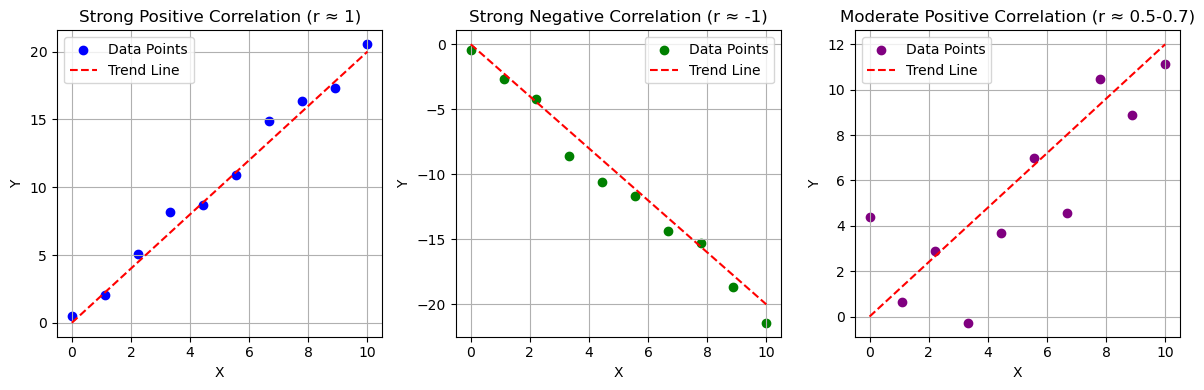

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for different Pearson correlation scenarios
np.random.seed(42)
x = np.linspace(0, 10, 10)

# Strong Positive Correlation (r ≈ 1)
y_strong_pos = 2 * x + np.random.normal(0, 1, len(x))

# Strong Negative Correlation (r ≈ -1)
y_strong_neg = -2 * x + np.random.normal(0, 1, len(x))

# Moderate Positive Correlation (r ≈ 0.5 - 0.7)
y_moderate_pos = 1.2 * x + np.random.normal(0, 3, len(x))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust width and height

# Plot Strong Positive Correlation
axes[0].scatter(x, y_strong_pos, color='blue', label='Data Points')
axes[0].plot(x, 2*x, color='red', linestyle='dashed', label='Trend Line')
axes[0].set_title("Strong Positive Correlation (r ≈ 1)")

# Plot Strong Negative Correlation
axes[1].scatter(x, y_strong_neg, color='green', label='Data Points')
axes[1].plot(x, -2*x, color='red', linestyle='dashed', label='Trend Line')
axes[1].set_title("Strong Negative Correlation (r ≈ -1)")

# Plot Moderate Positive Correlation
axes[2].scatter(x, y_moderate_pos, color='purple', label='Data Points')
axes[2].plot(x, 1.2*x, color='red', linestyle='dashed', label='Trend Line')
axes[2].set_title("Moderate Positive Correlation (r ≈ 0.5-0.7)")

# Set labels and layout
for ax in axes:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two cluster points
np.random.seed(42)
cluster1_x = np.random.normal(2, 0.5, 10)
cluster1_y = np.random.normal(2, 0.5, 10)

cluster2_x = np.random.normal(6, 0.5, 10)
cluster2_y = np.random.normal(6, 0.5, 10)

# New point introduced (closer to Cluster 1)
new_point_x = 3.2
new_point_y = 2.5

# Create the plot
plt.figure(figsize=(4,4))

# Plot clusters with dots (marker='o')
plt.scatter(cluster1_x, cluster1_y, color='blue', marker='o', label='Cluster 1')
plt.scatter(cluster2_x, cluster2_y, color='red', marker='o', label='Cluster 2')

# Plot new point as a dot
plt.scatter(new_point_x, new_point_y, color='green', marker='o', s=100, label='New Point')

# Labels and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Clusters with New Data Point")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
